In [1]:
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def get_mx(masspoint):
    return int(masspoint.split('/')[-2].split('_')[2].split('-')[1])

def get_my(masspoint):
    return int(masspoint.split('/')[-2].split('_')[3].split('-')[1])

In [3]:
masspoints = [mass for mass in get_NMSSM_list() if get_mx(mass) < 1300]

In [4]:
ax_labels = [r'Mass $H_X$ [GeV]', r'Mass $H_1$ [GeV]', r'Mass $H_2$ [GeV]']

In [5]:
MX, MY = [], []
HX, HX_unreg = [], []
bins = np.linspace(0,300,41)

with PdfPages('plots/bjer_mh.pdf') as pdf:
   for mass in masspoints:
        tree = SixB(mass)
        tree.init_unregressed()
        mhx = tree.HX.m
        mhx_unreg = tree.HX_unregressed.m
        mh1 = tree.H1.m
        mh1_unreg = tree.H1_unregressed.m
        mh2 = tree.H2.m
        mh2_unreg = tree.H2_unregressed.m

        fig, axs = plt.subplots(ncols=3, figsize=(30,10))

        Hist(mhx, bins=bins, weights=tree.genWeight, ax=axs[0], label='Regressed')
        Hist(mhx_unreg, bins=bins, weights=tree.genWeight, ax=axs[0], label='Unregressed')

        Hist(mh1, bins=bins, weights=tree.genWeight, ax=axs[1], label='Regressed')
        Hist(mh1_unreg, bins=bins, weights=tree.genWeight, ax=axs[1], label='Unregressed')

        Hist(mh2, bins=bins, weights=tree.genWeight, ax=axs[2], label='Regressed')
        Hist(mh2_unreg, bins=bins, weights=tree.genWeight, ax=axs[2], label='Unregressed')

        for i,ax in enumerate(axs.flatten()):
            ax.set_title(tree.sample)
            ax.set_xlabel(ax_labels[i])
            ax.legend()

        # limits.plot(ax=ax, xlabel=r'M$_\mathrm{X}$ [GeV]', ylabel=r'$\sigma(\mathrm{X}\rightarrow\mathrm{Y(HH)H}\rightarrow\mathrm{6b})$ [fb]')
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()

        break

# for mass in masspoints:
#     MX.append(get_mx(mass))
#     MY.append(get_my(mass))
#     tree = SixB(mass)
#     cutflows.append(tree.cutflow)

ntuple: /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-250_TuneCP5_13TeV-madgraph-pythia8/ntuple.root


model: /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMSSM_XToYHTo6B_MX-1000_MY-250_TuneCP5_13TeV-madgraph-pythia8.root


In [6]:
tree = SixB(masspoints[0])
# tree.init_unregressed()
# mhx = tree.HX.m
# mhx_unreg = tree.HX_unregressed.m
# mh1 = tree.H1.m
# mh1_unreg = tree.H1_unregressed.m
# mh2 = tree.H2.m
# mh2_unreg = tree.H2_unregressed.m
tree.jet_higgsIdx

ntuple: /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-250_TuneCP5_13TeV-madgraph-pythia8/ntuple.root


model: /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMSSM_XToYHTo6B_MX-1000_MY-250_TuneCP5_13TeV-madgraph-pythia8.root


<Array [[1, 0, -1, 1, 0, 2], ..., [2, 1, ..., 1, 0]] type='52943 * var * int32'>

In [7]:
import vector
vector.register_awkward()

def get_Higgs(tree, mask, found):
    pt = np.array(tree.jet_pt[mask][found].tolist())
    ptReg = np.array(tree.jet_ptRegressed[mask][found].tolist())
    eta = np.array(tree.jet_eta[mask][found].tolist())
    phi = np.array(tree.jet_phi[mask][found].tolist())
    m = np.array(tree.jet_m[mask][found].tolist())
    mReg = np.array(tree.jet_mRegressed[mask][found].tolist())

    b1 = vector.arr({
            "pt"  : pt[:,0],
            "eta" : eta[:,0],
            "phi" : phi[:,0],
            "m"   : m[:,0]
        })
    b1Reg = vector.arr({
            "pt"  : ptReg[:,0],
            "eta" : eta[:,0],
            "phi" : phi[:,0],
            "m"   : mReg[:,0]
        })
    
    b2 = vector.arr({
            "pt"  : pt[:,1],
            "eta" : eta[:,1],
            "phi" : phi[:,1],
            "m"   : m[:,1]
        })
    b2Reg = vector.arr({
            "pt"  : ptReg[:,1],
            "eta" : eta[:,1],
            "phi" : phi[:,1],
            "m"   : mReg[:,1]
        })
    H = b1 + b2
    HReg = b1Reg + b2Reg

    return H.m, HReg.m

In [8]:
HX_mask = tree.jet_higgsIdx == 0
H1_mask = tree.jet_higgsIdx == 1
H2_mask = tree.jet_higgsIdx == 2

HX_found = ak.sum(HX_mask, axis=1) == 2
H1_found = ak.sum(H1_mask, axis=1) == 2
H2_found = ak.sum(H2_mask, axis=1) == 2

HX_m, HX_mReg = get_Higgs(tree, HX_mask, HX_found)
H1_m, H1_mReg = get_Higgs(tree, H1_mask, H1_found)
H2_m, H2_mReg = get_Higgs(tree, H2_mask, H2_found)

array([0.00000000e+00, 0.00000000e+00, 5.96635342e-02, 6.00626469e-02,
       1.78436756e-01, 4.76939559e-01, 1.25200629e+00, 3.69855356e+00,
       7.09929180e+00, 1.48385706e+01, 2.40846119e+01, 4.58967476e+01,
       7.51648712e+01, 1.15109177e+02, 1.68461975e+02, 2.17788666e+02,
       2.45011963e+02, 2.30527588e+02, 1.63791260e+02, 1.06796997e+02,
       7.56534424e+01, 6.68811035e+01, 6.03098145e+01, 5.28168945e+01,
       4.41121826e+01, 3.23551025e+01, 2.03254395e+01, 1.36456299e+01,
       9.17126465e+00, 7.27026367e+00, 5.95849609e+00, 4.82629395e+00,
       3.63134766e+00, 2.38452148e+00, 9.55200195e-01, 1.66931152e+00,
       1.30993652e+00, 6.55883789e-01, 4.75952148e-01, 9.53979492e-01])

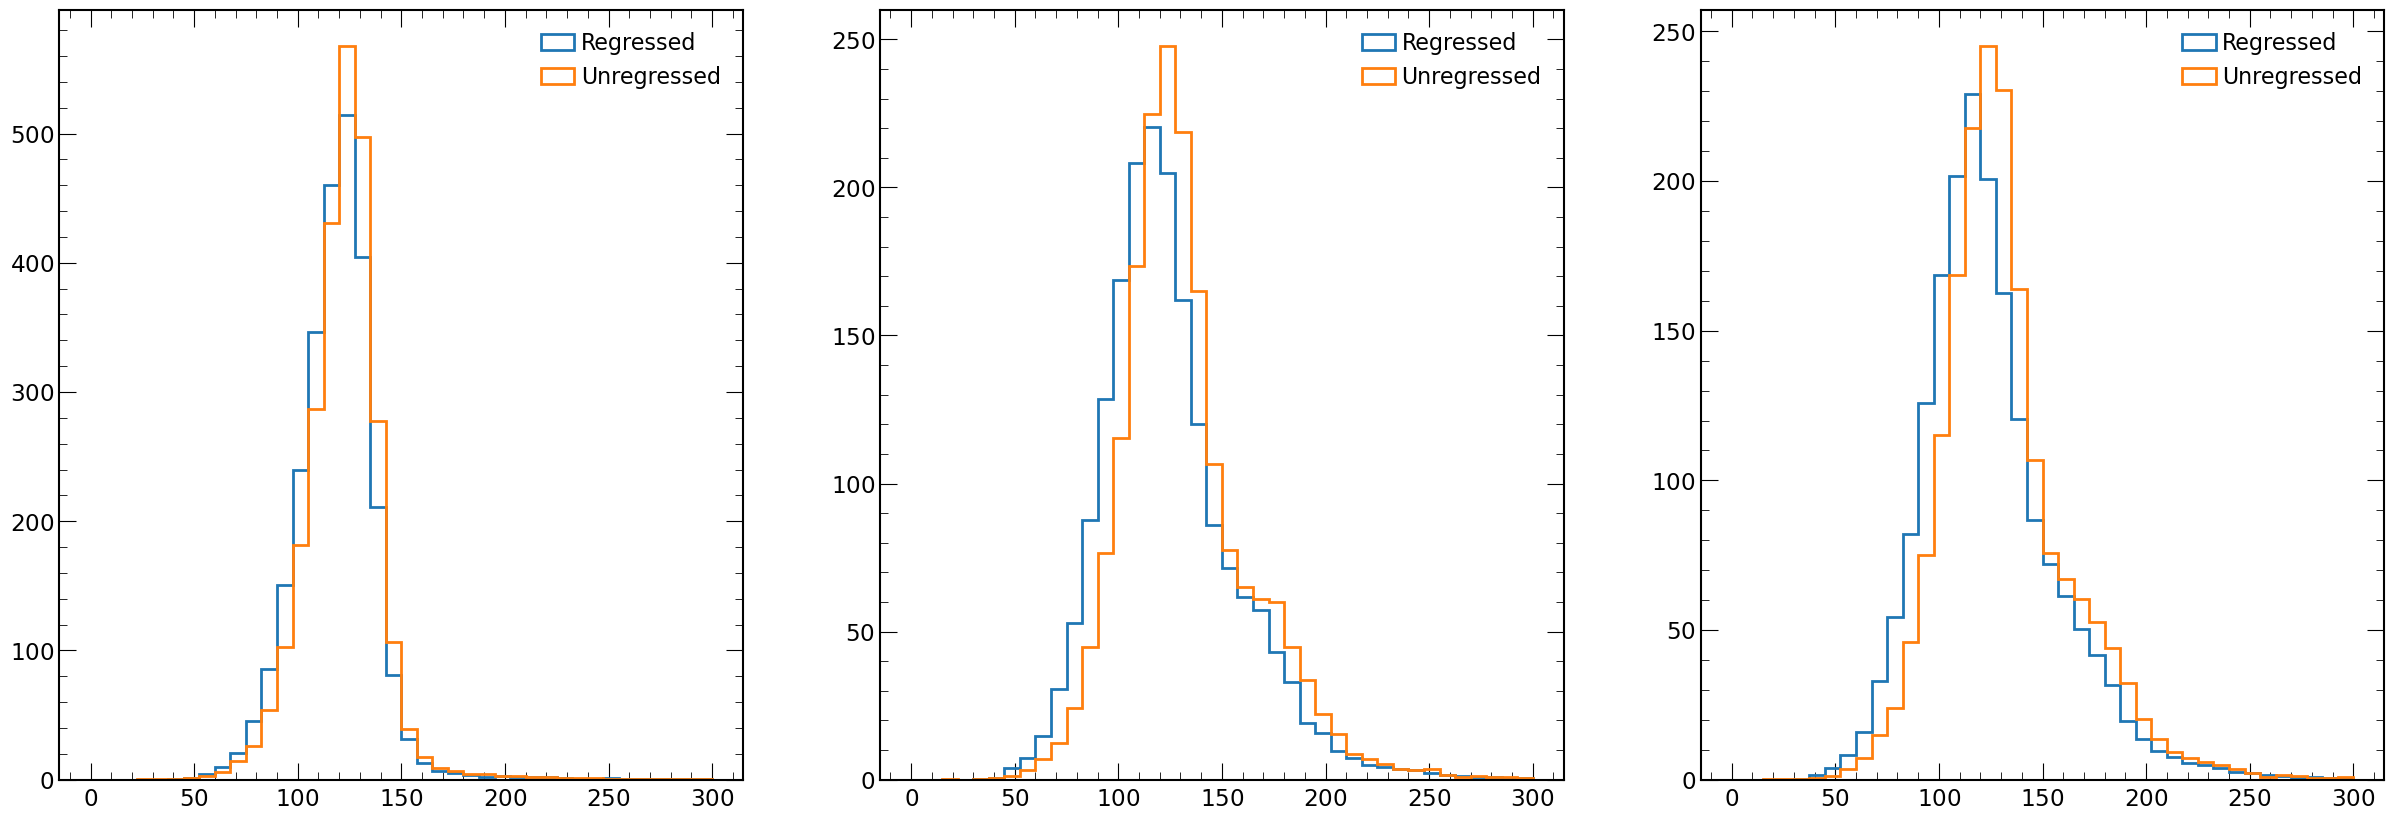

In [9]:
fig, axs = plt.subplots(ncols=3, figsize=(30,10))

Hist(HX_m, bins=bins, weights=tree.genWeight[HX_found], ax=axs[0], label='Regressed')
Hist(HX_mReg, bins=bins, weights=tree.genWeight[HX_found], ax=axs[0], label='Unregressed')

Hist(H1_m, bins=bins, weights=tree.genWeight[H1_found], ax=axs[1], label='Regressed')
Hist(H1_mReg, bins=bins, weights=tree.genWeight[H1_found], ax=axs[1], label='Unregressed')

Hist(H2_m, bins=bins, weights=tree.genWeight[H2_found], ax=axs[2], label='Regressed')
Hist(H2_mReg, bins=bins, weights=tree.genWeight[H2_found], ax=axs[2], label='Unregressed')


In [10]:
with PdfPages('plots/bjer_mh.pdf') as pdf:
   for mass in masspoints:
        tree = SixB(mass)
        
        HX_mask = tree.jet_higgsIdx == 0
        H1_mask = tree.jet_higgsIdx == 1
        H2_mask = tree.jet_higgsIdx == 2

        HX_found = ak.sum(HX_mask, axis=1) == 2
        H1_found = ak.sum(H1_mask, axis=1) == 2
        H2_found = ak.sum(H2_mask, axis=1) == 2

        HX_m, HX_mReg = get_Higgs(tree, HX_mask, HX_found)
        H1_m, H1_mReg = get_Higgs(tree, H1_mask, H1_found)
        H2_m, H2_mReg = get_Higgs(tree, H2_mask, H2_found)

        fig, axs = plt.subplots(ncols=3, figsize=(30,10))

        Hist(HX_m, bins=bins, weights=tree.genWeight[HX_found], ax=axs[0], label='Unregressed')
        Hist(HX_mReg, bins=bins, weights=tree.genWeight[HX_found], ax=axs[0], label='Regressed')

        Hist(H1_m, bins=bins, weights=tree.genWeight[H1_found], ax=axs[1], label='Unregressed')
        Hist(H1_mReg, bins=bins, weights=tree.genWeight[H1_found], ax=axs[1], label='Regressed')

        Hist(H2_m, bins=bins, weights=tree.genWeight[H2_found], ax=axs[2], label='Unregressed')
        Hist(H2_mReg, bins=bins, weights=tree.genWeight[H2_found], ax=axs[2], label='Regressed')

        for i,ax in enumerate(axs.flatten()):
            ax.set_title(tree.sample)
            ax.set_xlabel(ax_labels[i])
            ax.legend()

        # limits.plot(ax=ax, xlabel=r'M$_\mathrm{X}$ [GeV]', ylabel=r'$\sigma(\mathrm{X}\rightarrow\mathrm{Y(HH)H}\rightarrow\mathrm{6b})$ [fb]')
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()
        # break

ntuple: /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-250_TuneCP5_13TeV-madgraph-pythia8/ntuple.root


model: /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMSSM_XToYHTo6B_MX-1000_MY-250_TuneCP5_13TeV-madgraph-pythia8.root
ntuple: /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-300_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
model: /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMSSM_XToYHTo6B_MX-1000_MY-300_TuneCP5_13TeV-madgraph-pythia8.root
ntuple: /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-350_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
model: /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/pred

In [11]:
bkg = Bkg(get_qcd_ttbar('maxbtag_4b'))

/eos/uscms/store/user/srosenzw/sixb/ntuples
Summer2018UL/maxbtag_4b/QCD/QCD_bEnriched_HT100to200_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/maxbtag_4b/QCD/QCD_bEnriched_HT200to300_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/maxbtag_4b/QCD/QCD_bEnriched_HT300to500_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/maxbtag_4b/QCD/QCD_bEnriched_HT500to700_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/maxbtag_4b/QCD/QCD_bEnriched_HT700to1000_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/maxbtag_4b/QCD/QCD_bEnriched_HT1000to1500_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/maxbtag_4b/QCD/QCD_bEnriched_HT1500to2000_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/maxbtag_4b/QCD/QCD_bEnriched_HT2000toInf_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/maxbtag_4b/QCD/QCD_HT100to200_BGenFilter_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/maxbtag_4b/QCD/QCD_HT200to300_BGenFilter_TuneCP5_13TeV-madgraph-pythia8/

In [12]:
bkg_higgs = [bkg.HX.m, bkg.H1.m, bkg.H2.m]
bkg_deltaM = np.column_stack(([abs(mH - 125) for mH in bkg_higgs]))
bkg_deltaM = np.sqrt((bkg_deltaM*bkg_deltaM).sum(axis=1))
bkg_deltaM

array([ 81.69808683, 313.95159596, 204.75163961, ..., 168.18868006,
       607.98795781, 267.29131736])

In [13]:
with PdfPages('plots/higgs_masses.pdf') as pdf:
   for mass in masspoints:
        fig, ax = plt.subplots()

        tree = SixB(mass)
        
        higgs = [tree.HX.m, tree.H1.m, tree.H2.m]
        deltaM = np.column_stack(([abs(mH - 125) for mH in higgs]))
        deltaM = np.sqrt((deltaM*deltaM).sum(axis=1))

        Hist(deltaM, bins=np.linspace(0,200,41), density=True, ax=ax, label=tree.sample)
        Hist(bkg_deltaM, bins=np.linspace(0,200,41), density=True, ax=ax, label='Background')

        # for i,ax in enumerate(axs.flatten()):
        # ax.set_title(tree.sample)
        ax.set_ylabel('AU')
        ax.set_xlabel(r'$\sqrt{(M(H_X)-125)^2 + (M(H_1)-125)^2 + (M(H_2)-125)^2}$ GeV')
        ax.legend()

        # limits.plot(ax=ax, xlabel=r'M$_\mathrm{X}$ [GeV]', ylabel=r'$\sigma(\mathrm{X}\rightarrow\mathrm{Y(HH)H}\rightarrow\mathrm{6b})$ [fb]')
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()
        # break

ntuple: /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-250_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
model: /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMSSM_XToYHTo6B_MX-1000_MY-250_TuneCP5_13TeV-madgraph-pythia8.root
ntuple: /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-300_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
model: /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMSSM_XToYHTo6B_MX-1000_MY-300_TuneCP5_13TeV-madgraph-pythia8.root
ntuple: /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-350_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
mod